## Secrets Config

In [1]:
HUGGING_FACE_TOKEN = "..."
WANDB_TOKEN = "..."

## Setup

In [ ]:

!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
!pip install datasets

In [ ]:
!pip install torchvision

In [ ]:
!pip install wandb

In [ ]:
!pip install -U --pre triton

In [ ]:

from subprocess import getoutput
from IPython.display import HTML
from IPython.display import clear_output
import time

s = getoutput('nvidia-smi')
if 'T4' in s:
  gpu = 'T4'
elif 'P100' in s:
  gpu = 'P100'
elif 'V100' in s:
  gpu = 'V100'
elif 'A100' in s:
  gpu = 'A100'

while True:
    try:
        gpu=='T4'or gpu=='P100'or gpu=='V100'or gpu=='A100'
        break
    except:
        pass
    print('[1;31mit seems that your GPU is not supported at the moment')
    time.sleep(5)

if (gpu=='T4'):
  %pip install -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/T4/xformers-0.0.13.dev0-py3-none-any.whl

elif (gpu=='P100'):
  %pip install -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/P100/xformers-0.0.13.dev0-py3-none-any.whl

elif (gpu=='V100'):
  %pip install -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/V100/xformers-0.0.13.dev0-py3-none-any.whl

elif (gpu=='A100'):
  %pip install -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/A100/xformers-0.0.13.dev0-py3-none-any.whl

In [4]:
from huggingface_hub import notebook_login, login

login(
    token=HUGGING_FACE_TOKEN,
    add_to_git_credential=True,
    write_permission=True,
)

Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /home/jupyter/.cache/huggingface/token
Login successful


In [5]:
import wandb

wandb.login()


True

## Imports

In [19]:
from huggingface_hub.repocard import RepoCard


## Run Training

In [10]:
!cd "diffusers/examples/text_to_image" && \
accelerate launch \
    --mixed_precision="fp16" \
    train_text_to_image_lora.py \
    --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
    --dataset_name="trajanson/black-long-sleeve-jersey" \
    --caption_column="text" \
    --resolution=512 \
    --random_flip \
    --train_batch_size=1 \
    --num_train_epochs=500 \
    --checkpointing_steps=5000 \
    --learning_rate=1e-04 \
    --lr_scheduler="constant" \
    --lr_warmup_steps=0 \
    --seed=42 \
    --output_dir="/home/jupyter/models/black_long_sleeve_jersey_4" \
    --cache_dir="/home/jupyter/cache" \
    --validation_prompt="black long sleeve women's jersey" \
    --gradient_accumulation_steps=4 \
    --report_to="wandb" \
    --hub_token="..." \
    --push_to_hub

2023-08-26 07:06:58.355494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 07:06:59.599199: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-08-26 07:06:59.599337: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

## Run Inference

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

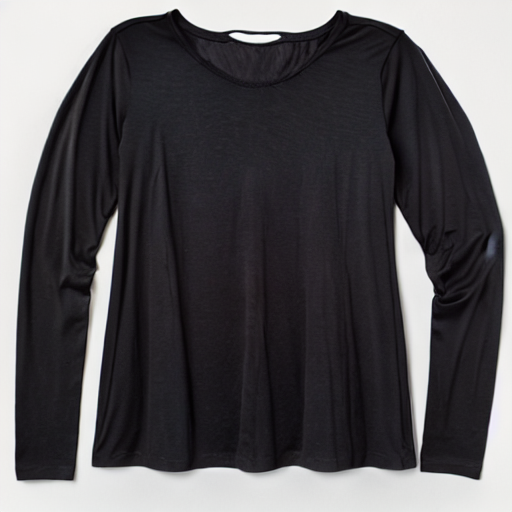

In [16]:
from diffusers import StableDiffusionPipeline
import torch

def run_inference(
    prompt: str,
):

    # model_path = OUTPUT_DIR
    pipe = StableDiffusionPipeline.from_pretrained(
        MODEL_NAME,
        torch_dtype=torch.float16,
    )
    pipe.unet.load_attn_procs(OUTPUT_DIR)
    pipe.to("cuda")

    prompt = "all black long sleeve women's jersey. centered"
    image = pipe(
        prompt,
        num_inference_steps=30,
        guidance_scale=7.5
    ).images[0]
    
    return image




In [ ]:
run_inference(
    prompt="all black long sleeve women's jersey. centered",
)